# Customer Segmentation (based on Clustering) 
This project aims to develop a customer segmentation model using unsupervised clustering techniques to analyze and group customers based on their transaction behaviors. By clustering customers into distinct groups, we can understand underlying patterns in customer behavior, ultimately enabling targeted marketing and tailored product offerings.

### _Project Stages_
##### 1. Data Preprocessing
We cleaned and prepared the dataset by handling missing values, standardizing features, and performing feature engineering to capture meaningful customer behaviors. Dimensionality reduction using Principal Component Analysis (PCA) was applied to retain essential patterns while simplifying the dataset and enhancing clustering outcomes.

##### 2. Exploratory Data Analysis (EDA)
We conducted initial statistical analysis and visualizations to understand data distributions, trends, and potential correlations. EDA provided insights into customer behaviors and spending patterns, which guided feature engineering and the selection of clustering methods.

##### 3. Clustering Algorithms
Three clustering algorithms were implemented: K-Means, Agglomerative Clustering, and DBSCAN, each offering unique perspectives on data segmentation. Cluster quality was evaluated using the Silhouette score to assess the separation of clusters and determine the optimal number of clusters.

##### 4. Cluster Visualization, Interpretation and Analysis
We used t-SNE for 2D visualization of clusters to observe overlaps and cluster characteristics. Analyzing cluster distributions and overlaps helped us identify customer behaviors within each segment. Each cluster was analyzed based on feature means and standard deviations to identify unique traits, such as high-volume spenders or consistent cash advance users.

##### 5. Insights and Business Recommendations
Actionable insights were provided to align marketing strategies and product offerings with each segment’s needs, like tailored rewards, loan offers, and engagement initiatives.

This segmentation model enables targeted, personalized marketing strategies based on a deep understanding of customer behavior.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the dataset
file_path = 'C:/Users/sanya/csci485 Dropbox/Sanya Kapoor/My PC (DESKTOP-RP85OO9)/Downloads/Customer_Data.csv'
data = pd.read_csv(file_path)

## Part 1 - Data Preprocessing

We began by preparing the data for clustering. Key preprocessing steps include:

1. Dropping Unnecessary Columns: Dropped 'CUST_ID' as it is irrelevant for clustering.
2. Handling Missing Values: Imputed missing values with the median, which is robust to outliers.
3. Standardization: Standardized numerical features to ensure comparable scaling, essential for clustering accuracy.
4. Feature Engineering: Created new attributes, such as the Purchase-to-Balance Ratio, Cash Advance-to-Balance Ratio, and others, to capture customer spending patterns.
5. Dimensionality Reduction (PCA): Applied PCA to reduce dimensions, retaining maximum variance with fewer features for improved clustering.

In [3]:
# Data Preprocessing
# Dropping the 'CUST_ID' as it's not useful for clustering
data_cleaned = data.drop(columns=['CUST_ID'], errors='ignore')  # In case 'CUST_ID' is not in the dataset

In [4]:
# Convert all columns to numeric, setting errors to 'coerce' for non-numeric values
data = data.apply(pd.to_numeric, errors='coerce')

In [5]:
# Handle missing values by imputing with median
data.fillna(data.median(), inplace=True)

In [6]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

c:\Users\sanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\sanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\sanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [7]:
# Convert scaled data back to DataFrame to ensure compatibility
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

In [8]:
# Verify that data_scaled has no NaN or infinity values
print("Checking for NaN or Infinity in data_scaled...")
nan_count = np.isnan(data_scaled).sum()
inf_count = np.isinf(data_scaled).sum()
print(f"NaN count: {nan_count}, Infinity count: {inf_count}")

Checking for NaN or Infinity in data_scaled...
NaN count: 8950, Infinity count: 0


In [9]:
# If any NaN or Infinity values are found, replace them with appropriate values
# Re-run scaling if necessary
if nan_count > 0 or inf_count > 0:
    data_scaled = np.nan_to_num(data_scaled, nan=0.0, posinf=1e10, neginf=-1e10)

### DIMENSION REDUCTION

In [10]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
data_reduced_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'], dtype=np.float64)

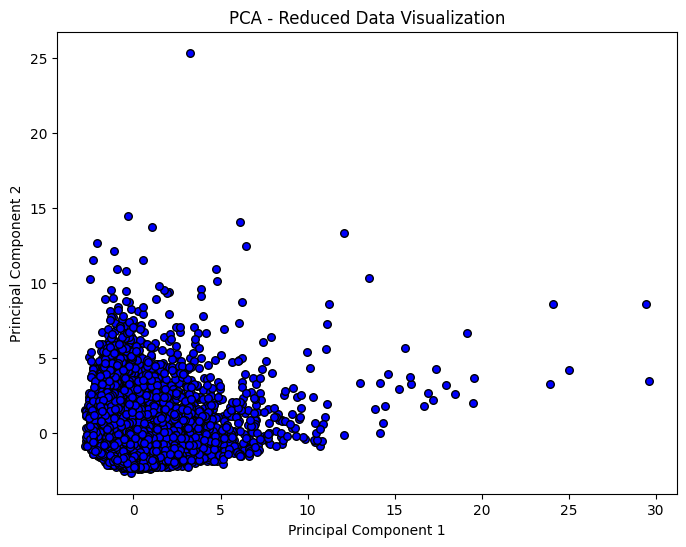

In [11]:
# Visualization of PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced_df['PC1'], data_reduced_df['PC2'], s=30, color='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Data Visualization')
plt.show()

In [12]:
# Applying PCA to understand variance explained by components
pca_full = PCA().fit(data_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

In [13]:
import matplotlib.pyplot as plt

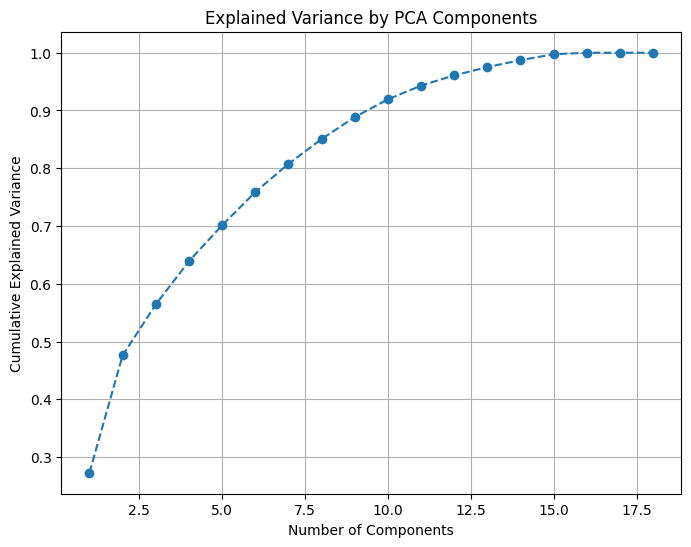

In [14]:
# Plotting explained variance to see how many components capture most of the data variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [15]:
# Choosing number of components to retain 90% of variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Number of components to retain 90% of the variance: {n_components}")

Number of components to retain 90% of the variance: 10


In [16]:
# Applying PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
data_reduced = pca_optimal.fit_transform(data_scaled)

## Part 2 - EXPLORATORY DATA ANALYSIS (EDA)

1. Dataset Structure: The dataset includes financial features like BALANCE, PURCHASES, and CASH_ADVANCE, which reflect customer spending and account behaviors.
2. Descriptive Statistics: Key attributes show substantial variance, especially in features like BALANCE and PURCHASES, indicating diverse financial behaviors.
3. Correlations Among Features: High correlations between attributes such as PURCHASES and PAYMENTS suggest common spending patterns.
4. Feature Distributions: Skewed distributions in features like CASH_ADVANCE highlight differing customer usage patterns, with some relying on cash advances more than others.

This EDA stage offered essential insights that shaped the approach to clustering.

In [17]:
# EDA - Exploratory Data Analysis
print("Data Summary:")
print(data.describe())  

Data Summary:
       CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count      0.0   8950.000000        8950.000000   8950.000000   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       8950.000000             8950.000000   8950.000000   
mean         592.437371              411.067645    978.871112   
std         1659.887917              904.338115   2097.163877   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%       

In [18]:
# Check for any remaining missing values
print("\nMissing Values:\n", data.isnull().sum())  


Missing Values:
 CUST_ID                             8950
BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64


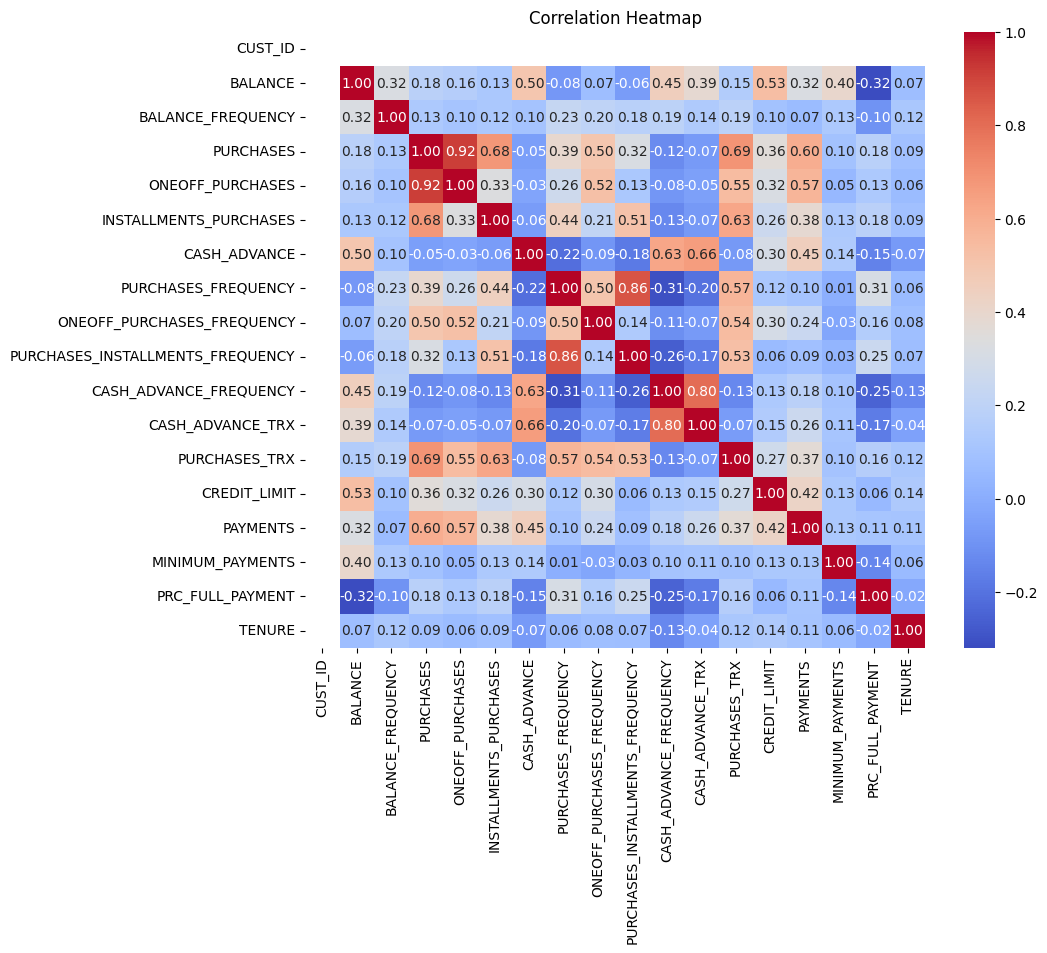

In [19]:
# Correlation Heatmap to understand relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Part 3 - CLUSTERING ALGORITHMS 

Three clustering methods—K-Means, Agglomerative Clustering, and DBSCAN—were employed on the reduced data, each evaluated using Silhouette scores.

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [21]:
# K-Means on reduced data
kmeans_reduced = KMeans(n_clusters=4, random_state=42)
kmeans_reduced_labels = kmeans_reduced.fit_predict(data_reduced)

In [22]:
# Agglomerative Clustering on reduced data
agg_reduced = AgglomerativeClustering(n_clusters=4)
agg_reduced_labels = agg_reduced.fit_predict(data_reduced)

In [23]:
# DBSCAN on reduced data
dbscan_reduced = DBSCAN(eps=2, min_samples=5)
dbscan_reduced_labels = dbscan_reduced.fit_predict(data_reduced)

In [24]:
# Comparing Silhouette Scores for kmeans & agglomerative clustering
kmeans_reduced_silhouette = silhouette_score(data_reduced, kmeans_reduced_labels)
agg_reduced_silhouette = silhouette_score(data_reduced, agg_reduced_labels)

In [25]:
# DBSCAN Silhouette Score

# Check if DBSCAN forms more than 1 cluster (excluding noise points labeled as -1)
unique_labels = set(dbscan_reduced_labels)
# We need to have more than 1 cluster (excluding noise)
if len(unique_labels) > 1 and len(set(dbscan_reduced_labels[dbscan_reduced_labels != -1])) > 1:
    # Exclude noise points (-1) from the silhouette score calculation
    dbscan_reduced_silhouette = silhouette_score(data_reduced[dbscan_reduced_labels != -1], dbscan_reduced_labels[dbscan_reduced_labels != -1])
else:
    dbscan_reduced_silhouette = "Not Applicable (Only one cluster or all noise)"

In [26]:
# Print the Silhouette Scores for comparison
silhouette_reduced_scores = {
    "K-Means (Reduced Data)": kmeans_reduced_silhouette,
    "Agglomerative (Reduced Data)": agg_reduced_silhouette,
    "DBSCAN (Reduced Data)": dbscan_reduced_silhouette
}

print(silhouette_reduced_scores)


{'K-Means (Reduced Data)': 0.22108569982834086, 'Agglomerative (Reduced Data)': 0.2415774103785135, 'DBSCAN (Reduced Data)': 'Not Applicable (Only one cluster or all noise)'}


K-means silhouette score is 0.22 and Agglomerative silhouette score is 0.24. 

Initially, this shows our data is showing poor clustering with clusters not well separated. This could be potentially due to highly overlapping features. This is additionally indicated by DBSCAN, unable to produce any clusters as DBSCAN is not useful with highly dimensional data.

Now, we will undertake some extensive feature engineering and cluster validation to understand our data more comprehensively. This would enable us to identify clustering patterns more effectively.

## Part 4 - Cluster Interpretation

### Cluster Visualization

Used t-SNE to visualize clusters formed by K-Means and Agglomerative Clustering.

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Feature Engineering
data_cleaned['Purchase_to_Balance_Ratio'] = data_cleaned['PURCHASES'] / (data_cleaned['BALANCE'] + 1e-9)
data_cleaned['Cash_Advance_to_Balance_Ratio'] = data_cleaned['CASH_ADVANCE'] / (data_cleaned['BALANCE'] + 1e-9)
data_cleaned['Installments_to_Purchases_Ratio'] = data_cleaned['INSTALLMENTS_PURCHASES'] / (data_cleaned['PURCHASES'] + 1e-9)
data_cleaned['Payment_to_Balance_Ratio'] = data_cleaned['PAYMENTS'] / (data_cleaned['BALANCE'] + 1e-9)

We are creating new features by calculating ratios between existing variables. These ratios can provide important insights into customer behavior and help improve the performance of clustering algorithms by highlighting key relationships between different financial behaviors.

In [29]:
# Standardizing the newly engineered data
scaler = StandardScaler()
data_scaled_engineered = scaler.fit_transform(data_cleaned)

In [30]:
# Replace infinite values with NaN
data_scaled_engineered = np.where(np.isinf(data_scaled_engineered), np.nan, data_scaled_engineered)

# Remove any remaining NaN values by replacing them with zero or the mean, whichever makes more sense in the context
# Using zero in this example; alternatively, you can use `np.nanmean` to fill with column mean.
data_scaled_engineered = np.nan_to_num(data_scaled_engineered, nan=0.0, posinf=0.0, neginf=0.0)

In [31]:
# Apply t-SNE for dimensionality reduction (2 components for visualization)
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled_engineered)

In [32]:
# Visualizing K-Means Clusters using t-SNE
kmeans_reduced = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_reduced.fit_predict(data_scaled_engineered)

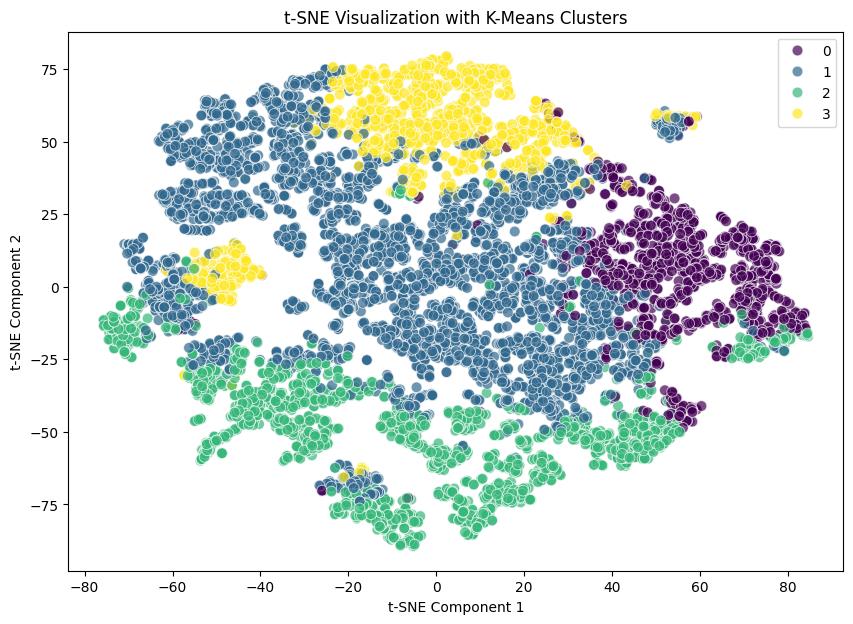

In [33]:
# Plotting t-SNE with K-Means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

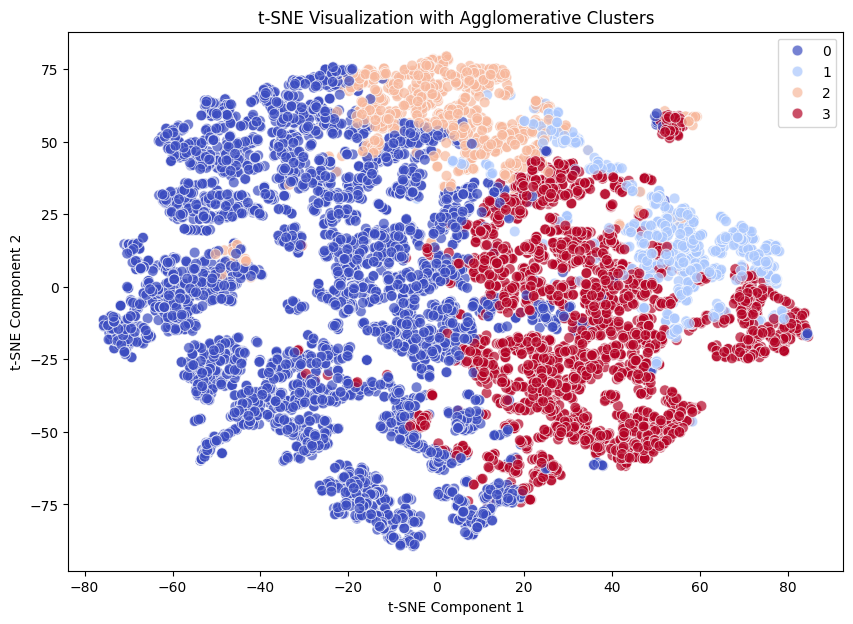

In [34]:
# Visualizing Agglomerative Clusters using t-SNE
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(data_scaled_engineered)

# Plotting t-SNE with Agglomerative clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=agg_labels, palette='coolwarm', s=60, alpha=0.7)
plt.title("t-SNE Visualization with Agglomerative Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Both the above visualizations show clusters with similar shapes and distribution in the 2D t-SNE space. The same regions are dominated by similar cluster labels, which suggests that both algorithms are picking up similar structures within the data.

Just like K-Means, Agglomerative Clustering also shows overlaps, especially between clusters 0 and 1 (blue and light blue in the Agglomerative plot), which is similar to the overlap between Cluster 0 (purple) and Cluster 1 (blue) in K-Means.

However, Agglomerative Clustering sometimes captures small, distinct clusters better as depicted in Cluster 3 (red) in the Agglomerative plot, which is more isolated than its K-Means counterpart.

### Cluster Analysis
To understand clusters’ characteristics:

Mean and Standard deviation analysis would help in examining central tendencies and variations within clusters, noting key behaviors and differences among customer groups.

Cluster Profiles: High averages in the Purchase-to-Balance and Cash Advance-to-Balance Ratios in certain clusters indicate customers likely engaged in high-volume transactions or cash advances, signaling potential target groups for specific banking products.

In [35]:
# ANALYZING CLUSTER CHARACTERISTICS

# Add both K-Means and Agglomerative Cluster labels to the dataset
data_cleaned['KMeans_Cluster'] = kmeans_labels
data_cleaned['Agg_Cluster'] = agg_labels

In [36]:
# Analyze the means of key features for each cluster (K-Means and Agglomerative)
kmeans_cluster_analysis = data_cleaned.groupby('KMeans_Cluster').mean()
agg_cluster_analysis = data_cleaned.groupby('Agg_Cluster').mean()

In [37]:
# Display the results (mean) 
print("K-Means Cluster Analysis:")
print(kmeans_cluster_analysis)

K-Means Cluster Analysis:
                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                                  
0               2251.512269           0.984024  4372.764775       2782.942358   
1               1282.721195           0.969430   500.012458        287.545720   
2                 96.074919           0.573865   517.633108        196.899895   
3               4322.286016           0.956748   421.844500        268.614374   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                          1590.331323    457.862990             0.953969   
1                           212.731006    501.823526             0.424221   
2                           321.125206    181.828467             0.514691   
3                           153.310244   4433.703002             0.249585   

                ONEOFF_P

In [38]:
print("\nAgglomerative Cluster Analysis:")
print(agg_cluster_analysis)


Agglomerative Cluster Analysis:
                 BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Agg_Cluster                                                                  
0            1112.230805           0.795396   316.971115        200.635086   
1            3286.125957           0.979345  5596.182763       3681.291115   
2            5002.649252           0.980862   485.076563        283.739715   
3             919.461757           0.969646  1276.464774        637.313709   

             INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Agg_Cluster                                                              
0                        116.635094    712.931184             0.253957   
1                       1915.807679    979.079190             0.930520   
2                        201.462990   4913.397904             0.266563   
3                        639.354221    268.751681             0.879866   

             ONEOFF_PURCHASES_FREQUENCY  PURCHASES_IN

### Mean Values of K-Means and Agglomerative Clustering:

#### K-Means:

K-Means Cluster 0 and Cluster 1 represent clear customer segments- high spenders who rely on installment and one-off purchases (Cluster 0) and moderate spenders with balanced use of installment and one-off purchases (Cluster 1). These clusters are easy to interpret and align with business strategies like promoting loyalty programs or offering higher credit limits.

Cluster 2 (low-balance customers with minimal spending) and Cluster 3 (high cash advance users) are distinct and well-defined, making them good targets for specific financial products like low-interest loans or debt reduction plans.

#### Agglomerative Clustering:

Agglomerative Cluster 1 and Cluster 0 also represent distinct customer groups that are easy to interpret: high spenders with heavy installment and one-off purchases (Cluster 1) and low spenders with moderate cash advance usage (Cluster 0).

Cluster 3 (moderate spenders) is easy to interpret, but the high variability in this cluster suggests that it includes both moderate and low spenders, which could make it harder to target. Cluster 2 represents high-balance customers who heavily rely on cash advances, making them ideal for financial counseling or debt management services.

In [39]:
# Display standard deviation to understand within-cluster variability
kmeans_cluster_std = data_cleaned.groupby('KMeans_Cluster').std()
agg_cluster_std = data_cleaned.groupby('Agg_Cluster').std()

print("\nK-Means Cluster Standard Deviation:")
print(kmeans_cluster_std)


K-Means Cluster Standard Deviation:
                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                                  
0               2613.281725           0.065946  4338.823980       3693.193278   
1               1149.961587           0.079827   623.063843        512.391387   
2                189.045131           0.311027   590.031966        457.319276   
3               2774.134239           0.112195   800.668769        606.640766   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                          1891.361568   1325.590966             0.107121   
1                           365.026249    796.191264             0.384223   
2                           443.653097    600.523860             0.367775   
3                           388.643176   3545.651736             0.340336   

             

In [40]:
print("\nAgglomerative Cluster Standard Deviation:")
print(agg_cluster_std)


Agglomerative Cluster Standard Deviation:
                 BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Agg_Cluster                                                                  
0            1352.699561           0.289586   501.746936        425.829710   
1            2918.981234           0.082481  5414.246365       4632.710298   
2            3029.304598           0.068722   931.548426        691.671316   
3            1133.318500           0.082910  1108.003650        927.837176   

             INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Agg_Cluster                                                              
0                        252.693546   1210.880016             0.293581   
1                       2344.762287   1968.099161             0.145616   
2                        503.592182   4190.558142             0.333851   
3                        653.695196    737.907281             0.174976   

             ONEOFF_PURCHASES_FREQUENCY  PU

### K-Means Cluster Standard Deviation:

Cluster 3 in K-Means has high variability (std dev) in key features like BALANCE and PURCHASES, which indicates less consistent behavior within this cluster.
Additionally, Cluster 2 and Cluster 0 have high variability in PURCHASES and INSTALLMENTS_PURCHASES , suggesting that these clusters contain customers with diverse spending behavior, also making them a less cohesive group.

Overall, K-Means struggles to create homogeneous clusters, especially in higher-spending groups (Cluster 3 & 0).
        
### Agglomerative Cluster Standard Deviation:

Cluster 0 and Cluster 1 in Agglomerative Clustering show relatively low variability in terms of balance and purchases, making these clusters more homogeneous and easier to target with specific strategies.
However, Agglomerative Cluster 3 has very high variability in purchases and installment purchases, indicating that this cluster might need further refinement.

Overall, Agglomerative Clustering provides more consistent clusters, especially in low- and moderate-spending groups. However, the variability in Cluster 3 suggests that high-spending customers are more diverse.


### Key Insights from Mean & Standard Deviation Analysis:

Cluster Homogeneity:
Agglomerative Cluster 0 & 1 show low variability across features like BALANCE and PURCHASES, suggesting these clusters are more homogeneous. These clusters are easier to target with a single marketing strategy, as the customers behave similarly.

Cluster Heterogeneity :
Agglomerative Cluster 3 has high standard deviation for purchases and installments. This suggests that there’s diverse customer behavior within these clusters. 
Variability in purchases indicates that a one-size-fits-all strategy might not work. It might be useful to further break this cluster down or tailor different strategies for customers at different spending levels.

Cash Advances:
In Agglomerative Cluster 2- high standard deviation is shown for cash advances, indicating that within this group, some customers heavily rely on cash advances while others do not. This variability suggests that targeted financial products (such as loans or lower interest rates on advances) might benefit certain customers more than others.



##### After tuning the K-Means and Agglomerative Clustering algorithms, we can clearly see the latter is able to make more meaningful and distinct clusters. But, lets first try to tune the DBSCAN algorithm, before deciding the best clustering algorithm for our dataset.

In [81]:
# DBSCAN TUNING

# For clustering, we will drop the `CUST_ID` as it's not useful for clustering and only use numerical features.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Drop the CUST_ID column and any rows with NaN values for simplicity
customer_data_clean = data.drop(columns=['CUST_ID']).dropna()

In [83]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data_clean)

In [44]:
# Compute the k-nearest neighbors (we use k=4 as a starting point for DBSCAN)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

In [45]:
# Sort the distances (we'll focus on the 4th distance)
distances = np.sort(distances[:, 3], axis=0)

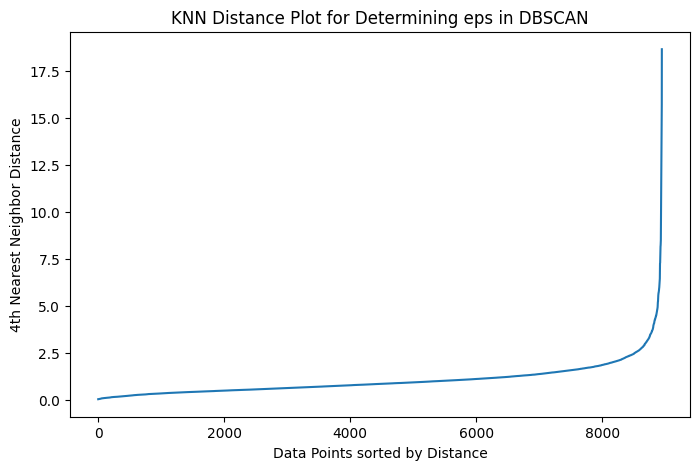

In [46]:
# Plot the k-distance graph to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("KNN Distance Plot for Determining eps in DBSCAN")
plt.xlabel("Data Points sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

In [118]:
# Look for the 'elbow' in the plot to select the appropriate eps value
optimal_eps = 2.45508979289522

In [119]:
# Apply DBSCAN with the given eps value
dbscan = DBSCAN(eps=optimal_eps, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [120]:
# Add the DBSCAN cluster labels to the original dataframe for reference
customer_data_clean['DBSCAN_Cluster'] = dbscan_labels

In [121]:
# Show the number of clusters formed and a sample of the clustering result
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise points (-1)

In [122]:
# Displaying the counts of each cluster
cluster_counts = customer_data_clean['DBSCAN_Cluster'].value_counts()

cluster_counts, num_clusters

(DBSCAN_Cluster
  0    8605
 -1     329
  1       4
  2       4
  3       4
  4       4
 Name: count, dtype: int64,
 5)

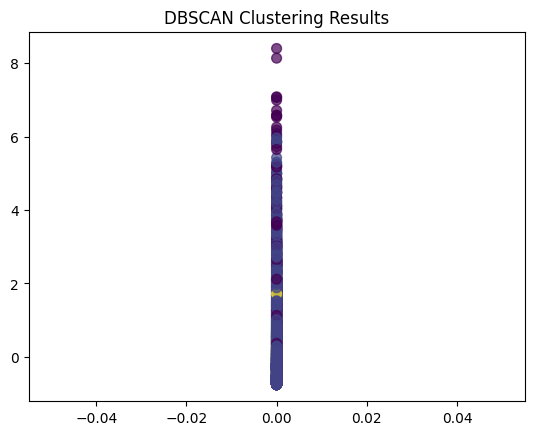

In [123]:

# Visualize the results if possible
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("DBSCAN Clustering Results")
plt.show()

### DBSCAN Results

Based on the KNN distance plot (which helps determine the optimal eps), the calculated eps value was 2.455. This value represents the radius within which data points are considered neighbors and form part of the same cluster.

Clustering Result:

Cluster 0 contains 8,605 data points, indicating that most points were grouped into a single large cluster.

Cluster -1 represents 329 noise points, meaning that these points were considered outliers or did not meet the density requirements to be part of any cluster.

Clusters 1, 2, 3, and 4 each contain 4 data points, suggesting that these are very small, isolated clusters that DBSCAN was able to form but they are likely not substantial clusters.

In total, the algorithm identified 5 clusters (clusters 0 to 4), but most points were either in one large cluster (cluster 0) or classified as noise. The small clusters of 4 points each might indicate areas of sparse data that barely met the clustering criteria. This result suggests that while there is a dominant cluster, the remaining clusters are likely not very meaningful due to their small size and may be an artifact of parameter choices.


## Best Clustering Algorithm

Out of all three clustering algorithms, **Agglomerative Clustering** seems to provide more consistent clusters for the majority of customer segments (low spenders, moderate spenders with installments). It is better at handling the variability across most clusters, especially in our dataset which is not perfectly spherical.

And since our goal is to have more interpretable and homogeneous clusters for targeting customer segments, Agglomerative Clustering seems to be the most appropriate method for this dataset.

## Part 5 - Insights and Business Recommendations 

Based on our analysis, Agglomerative Clustering emerged as the most effective algorithm for segmenting our customer base, delivering homogeneous, interpretable clusters. Below are actionable recommendations based on the distinct behaviors within each cluster:

##### 1. Cluster 0 (Low Spenders with Moderate Cash Advances)
Customers in Cluster 0 generally have low balances and engage in moderate spending. They may rely on occasional cash advances, indicating a need for financial support. Targeting these customers with **low-interest credit options or short-term loans** can encourage loyalty and engagement.

##### 2. Cluster 1 (High-Volume Spenders with Installment Purchases)
Cluster 1 consists of high-volume spenders who frequently use installment payments, suggesting that they value convenience and structured payment plans. Offering **exclusive rewards programs, higher credit limits, or cashback incentives** can enhance their loyalty and spending frequency.

##### 3. Cluster 2 (Cash Advance-Heavy Customers)
Cluster 2 shows customers heavily reliant on cash advances, which may signal short-term financial needs or limited credit access. Providing **debt management services, financial counseling, or lower interest rates on cash advances** can address their needs and promote responsible financial behavior.

##### 4. Cluster 3 (Diverse Spending Patterns with High Variability)
This cluster exhibits highly varied spending behaviors, which may indicate fluctuating financial needs. A personalized approach, including **flexible payment plans and customized financial products** based on spending patterns, could cater to their diverse preferences.

##### 5. High Variability in Spending
Certain segments within clusters show high variability, suggesting that a **single strategy may not apply universally.** Conducting further segmentation or periodic evaluations can ensure that marketing strategies remain relevant to shifting customer behaviors. Additionally, such clusters can be examined by specifically applying a clustering algorithm to gain deeper insights and recommend better.

##### 6. Enhanced Customer Engagement
Leverage these insights to design **targeted marketing campaigns** that resonate with each segment. For example, introducing personalized financial management tips or exclusive product offerings for different clusters can increase customer satisfaction and retention.

These targeted strategies, informed by Agglomerative Clustering insights, offer a roadmap for maximizing customer engagement, meeting financial needs, and enhancing profitability by aligning products with specific customer segments.